In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fourier optics as convolution
def optical_conv(a,b):
    fft1=np.fft.fftshift(np.fft.fft2(a))
    fft2=np.fft.fftshift(np.fft.fft2(b))
    output=np.fft.ifftshift(fft1*fft2)
    return np.fft.ifft2(output)

In [3]:
#initial value
a_=np.array([1,0,1,1,0,1,1,0,1,1,1,0,0,1,1]) #size=15
b_=np.array([1,1,1,1,0,1,1,0,0,0,0,0,1,1,1])
m=np.array([1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,1])
MM=np.array([1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1])


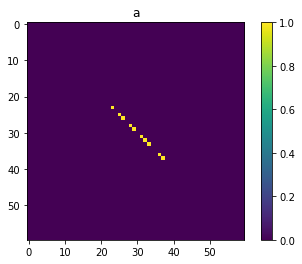

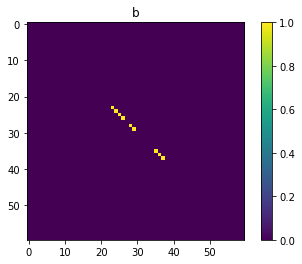

In [4]:
#send a b to an optical representive
N=60
a_screen=np.zeros((N,N))
b_screen=np.zeros((N,N))
size=len(a_)
for i in range(size):
    a_screen[i+N//2-size//2,i+N//2-size//2]=a_[i]
    b_screen[i+N//2-size//2,i+N//2-size//2]=b_[i]
    
plt.imshow(a_screen)
plt.colorbar()
plt.title('a')
plt.show()
plt.imshow(b_screen)
plt.colorbar()
plt.title('b')
plt.show()

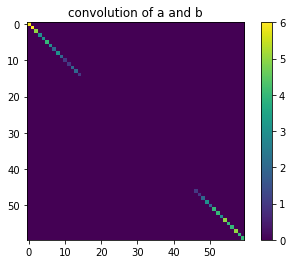

In [5]:
k1=optical_conv(a_screen,b_screen)
plt.imshow(np.abs(k1))
plt.colorbar()
plt.title('convolution of a and b')
plt.show()

In [6]:
for i in range(15):
    print(np.abs(k1)[45+i,45+i],np.abs(test3)[45+i,45+i])
for i in range(15):
    print(np.abs(k1)[i,i],np.abs(test3)[i,i])
    


NameError: name 'test3' is not defined

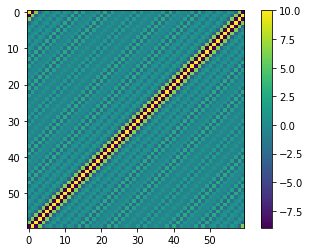

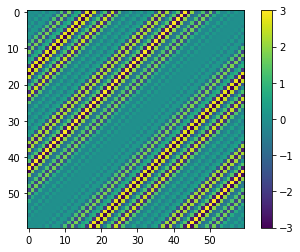

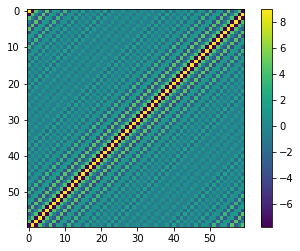

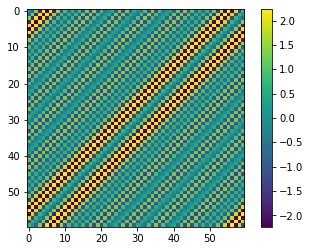

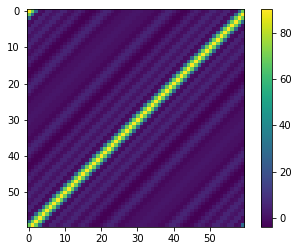

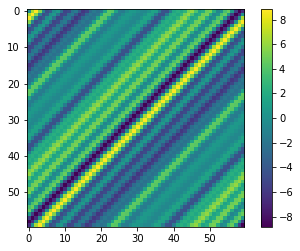

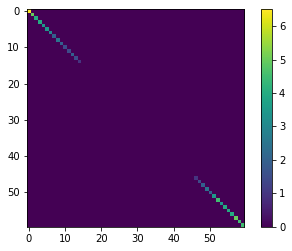

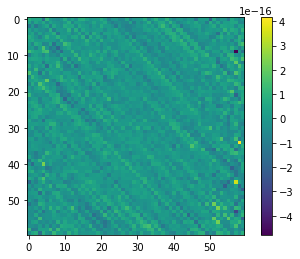

In [7]:
test=a_screen
test=np.fft.fft2(test)
#test=np.fft.fftshift(test)
#test=np.fft.ifftshift(test)
#test=np.fft.ifft2(test)
plt.imshow(np.real(test))
plt.colorbar()
plt.show()
plt.imshow(np.imag(test))
plt.colorbar()
plt.show()


test1=b_screen
test1=np.fft.fft2(test1)
#test=np.fft.fftshift(test)
#test=np.fft.ifftshift(test)
#test=np.fft.ifft2(test)
plt.imshow(np.real(test1))
plt.colorbar()
plt.show()
plt.imshow(np.imag(test1))
plt.colorbar()
plt.show()

plt.imshow(np.real(test1*test))
plt.colorbar()
plt.show()
plt.imshow(np.imag(test1*test))
plt.colorbar()
plt.show()


test3=np.fft.ifft2(test1*np.real(test))
plt.imshow(np.real(test3))
plt.colorbar()
plt.show()
plt.imshow(np.imag(test3))
plt.colorbar()
plt.show()